In [2]:
import plotly.express as px
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
points = pd.DataFrame({'x': [1,2,3,4,5,6], 'y': [0,0,0,0,0,0]})

In [4]:
model = KMeans(n_clusters=2, n_init=10, random_state=10) # multiple initializations

In [5]:
cluster_numbers = model.fit_predict(points)

In [6]:
cluster_numbers # cluster names do not matter 

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [7]:
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['1', '1', '1', '0', '0', '0']

In [8]:
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.show()

In [9]:
# drawing cluster centers - centroids
centroids = model.cluster_centers_
centroids

array([[5., 0.],
       [2., 0.]])

In [10]:
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y']
centroids # making array into dataframe

,x,y
0,5.0,0.0
1,2.0,0.0


In [11]:
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.add_scatter(x=centroids.x, y=centroids.y, mode='markers', name='Centroids', 
                marker=dict(size=20, symbol='triangle-up'), opacity=1.0)
fig.show()

In [12]:
points.y = [3,7,3,7,3,7] # updating y 
points

,x,y
0,1,3
1,2,7
2,3,3
3,4,7
4,5,3
5,6,7


In [13]:
model = KMeans(n_clusters=2, n_init=10, random_state=10)
cluster_numbers = model.fit_predict(points)
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['0', '1', '0', '1', '0', '1']

In [14]:
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y']
fig = px.scatter(points, x='x', y='y', color=cluster_labels)
fig.update_traces(marker=dict(size=20))
fig.add_scatter(x=centroids.x, y=centroids.y, mode='markers', name='Centroids', 
                marker=dict(size=20, symbol='triangle-up'), opacity=1.0)
fig.show()

In [15]:
points['z'] = points.x # making copy of x 
points

,x,y,z
0,1,3,1
1,2,7,2
2,3,3,3
3,4,7,4
4,5,3,5
5,6,7,6


In [16]:
# what happens if you have two highly correlated variables/dimensions (x and z)
    # double counting happens for that dimension (higher weight)! thus, may want to get rid of one of them. 
    # stronger impact for the correlated dimension/variable 

In [17]:
model = KMeans(n_clusters=2, n_init=10, random_state=10)
cluster_numbers = model.fit_predict(points)
cluster_labels = [str(c) for c in cluster_numbers]
cluster_labels

['0', '0', '0', '1', '1', '1']

In [18]:
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ['x','y','z']
centroids

,x,y,z
0,2.0,4.333333,2.0
1,5.0,5.666667,5.0


In [19]:
# putting centroids in points df
points_centroids = pd.concat([points, centroids])
labels = cluster_labels + ['Centroid 0', 'Centroid 1']
fig = px.scatter_3d(points_centroids, x='x', y='y', z='z', color= labels) # scatter function only works in 2D
fig.update_traces(marker=dict(size=10))
fig.show()

In [20]:
# how many clusters do you actually want??
    # want homogenous clusters and large distance between clusters 
    # want to REDUCE inertia/heat within clusters - min inertia means each point is its own cluster!

In [21]:
import matplotlib.pyplot as plt 
ks = range(1,7)
inertia = []

In [22]:
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(points)
    inertia.append(model.inertia_) # different kmeans for different k (values of clusters) and collecting respective inertias

In [23]:
inertia 
    # calculated as the sum of the squared distances between each data point and its assigned cluster's centroid

[59.0, 29.333333333333336, 17.0, 8.0, 4.0, 0.0]

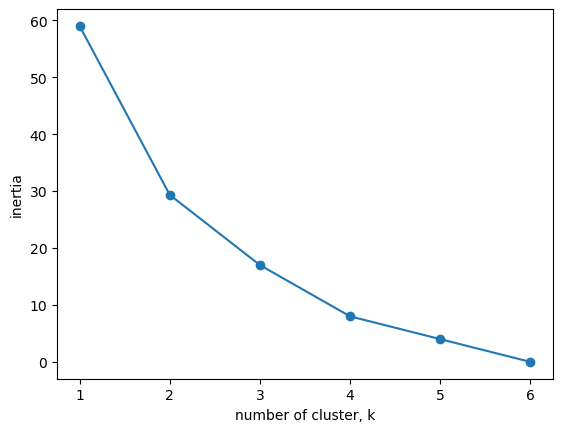

In [24]:
plt.plot(ks,inertia,'-o')
plt.xlabel('number of cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [25]:
# tradeoff between number of clusters k and inertia...thus, find 'elbow point' and choose k based on judgement

In [26]:
df = px.data.iris()

In [27]:
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                size='petal_length', hover_data=['petal_width'])
fig.show()

In [28]:
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width', color='species')
fig.show()

In [29]:
# these graphs show the 'truth' - actual labels 

In [30]:
# KMeans clustering of the data...
# scikit-learn.org/1.5/auto_examples/cluster/plot_cluster_iris.html

NameError: name 'scikit' is not defined

Inertia: 32.86731883116883
Inertia: 78.8556658259773
Inertia: 142.7540625


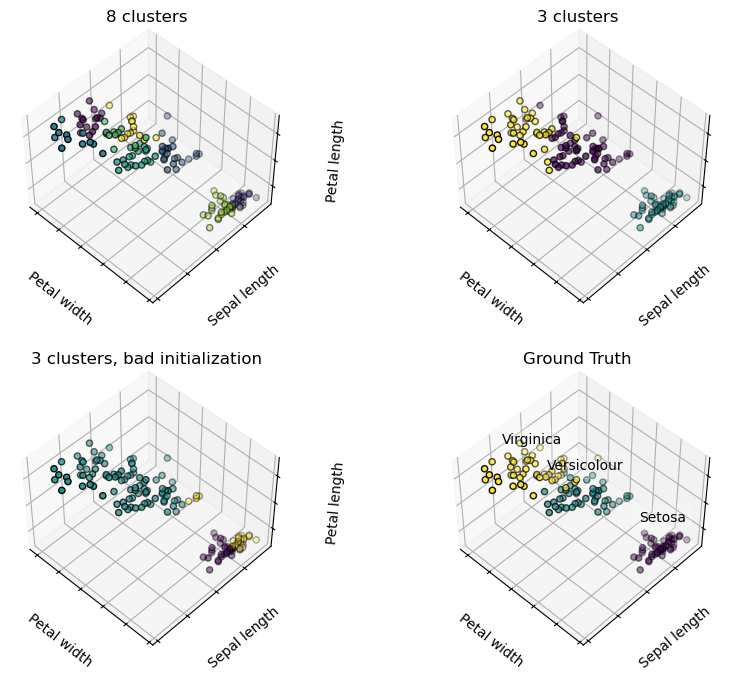

In [31]:
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(10)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print('Inertia:', est.inertia_)

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


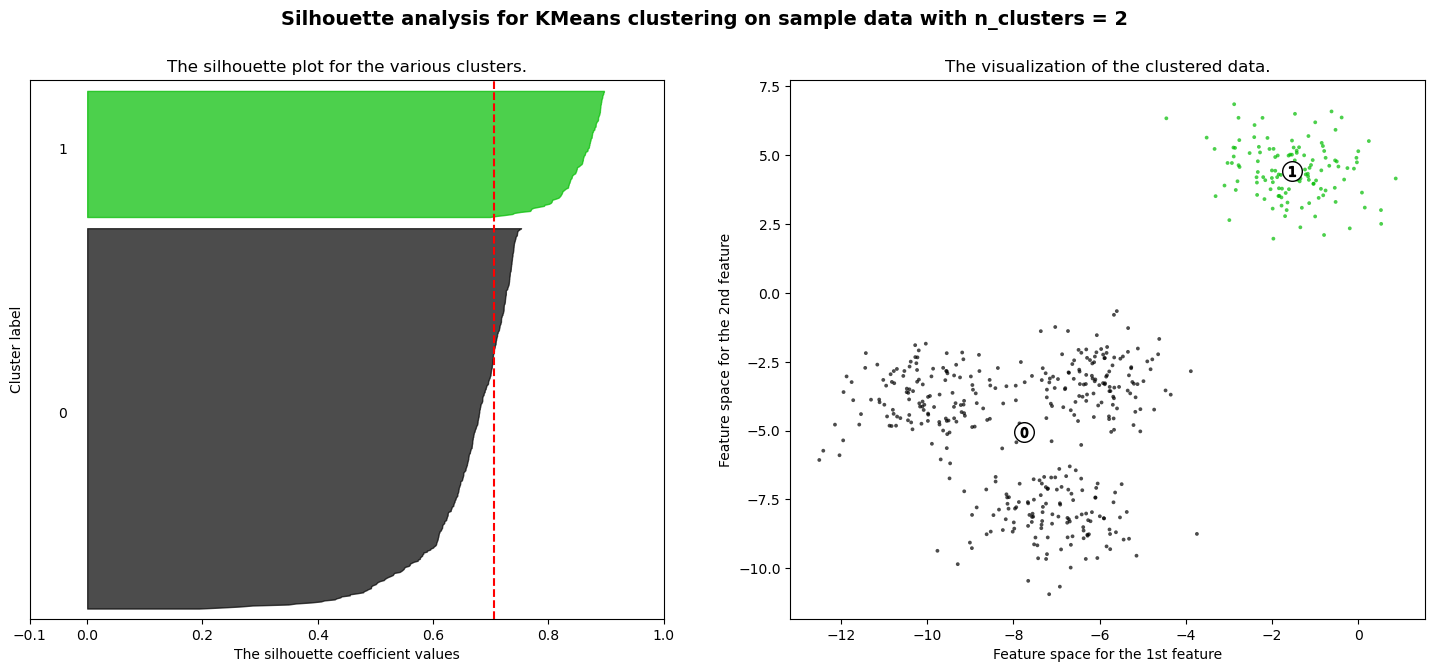

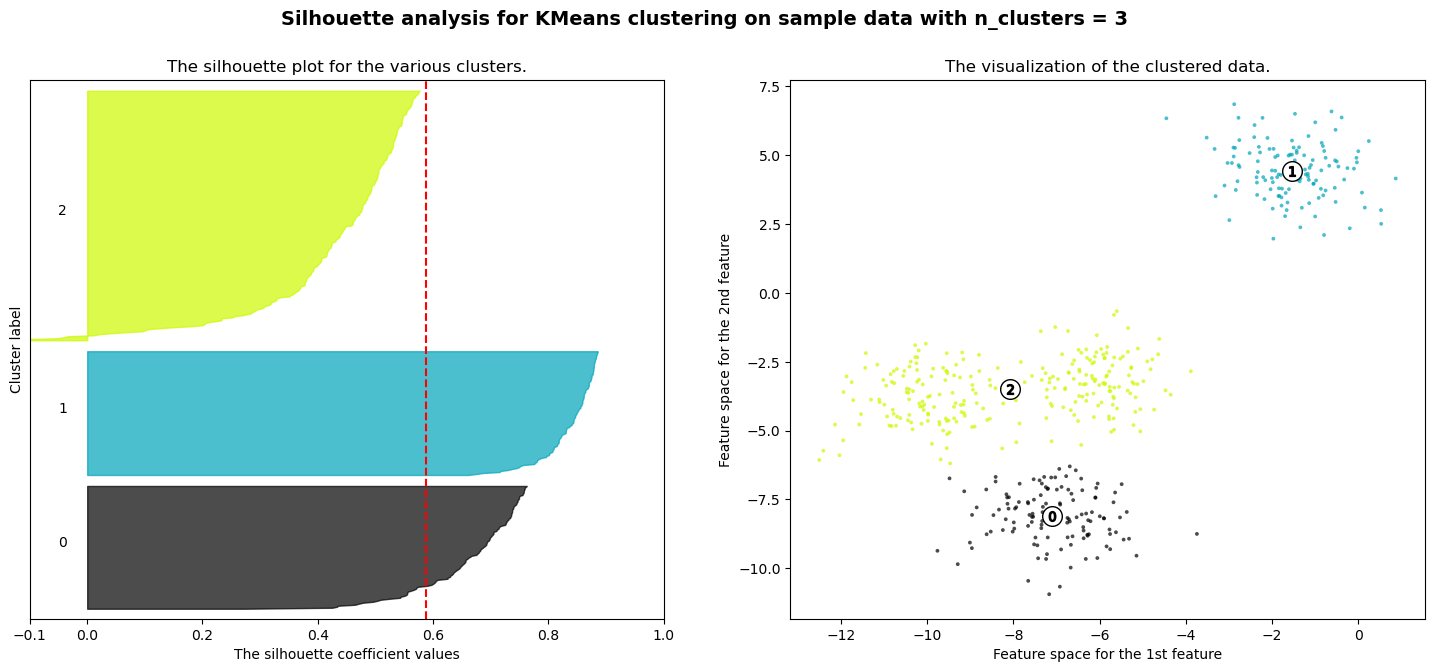

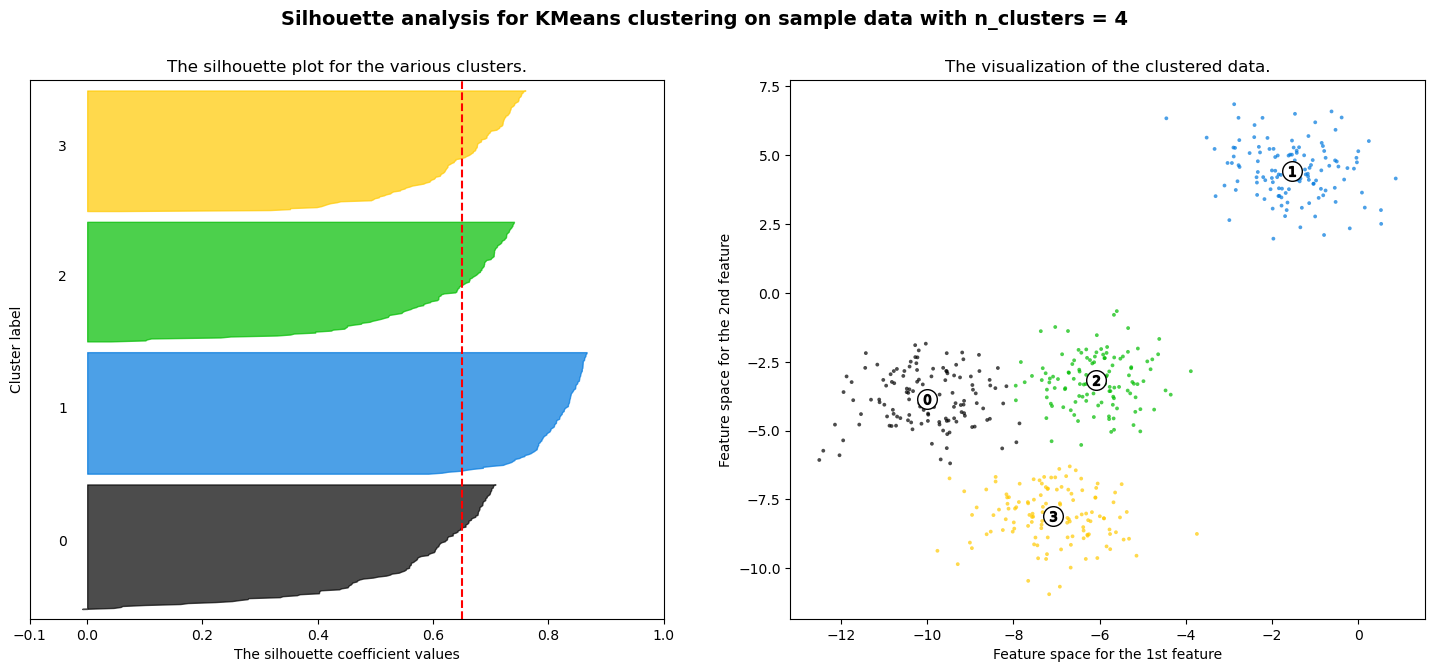

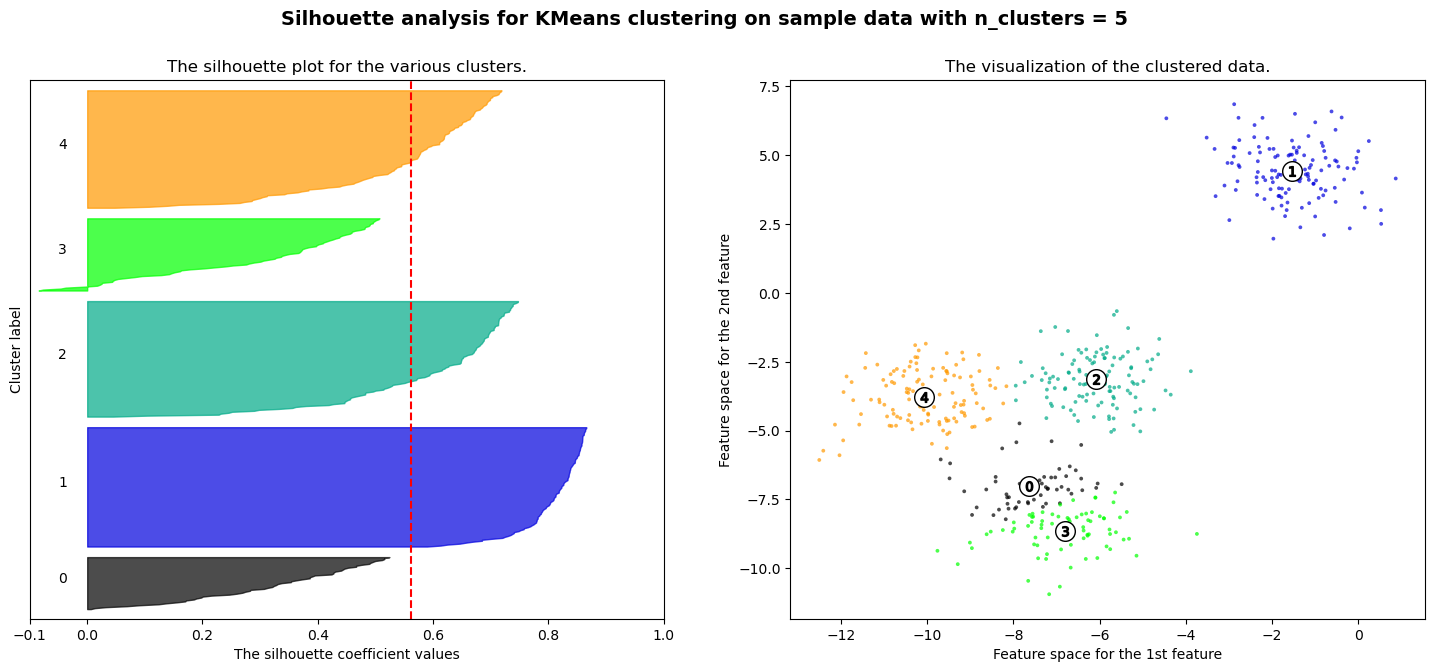

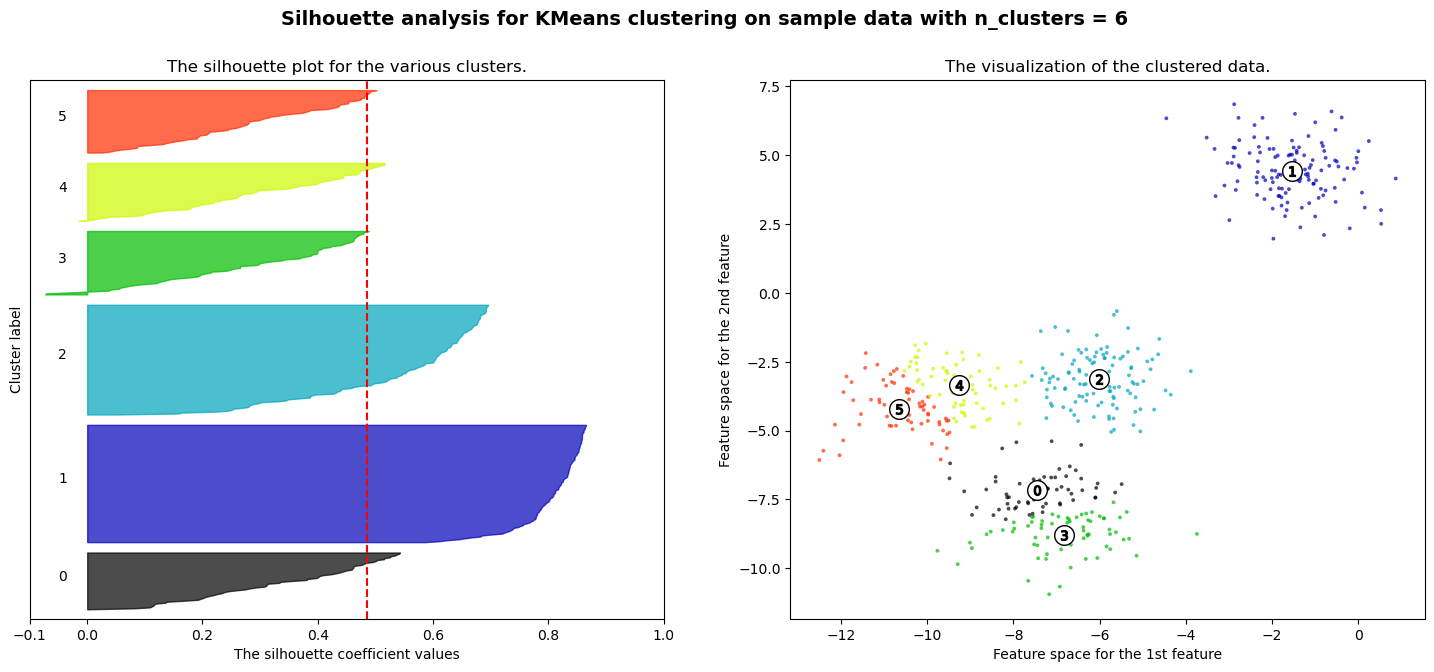

In [32]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [7]:
# Using different measures of distance and k cluster values 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ---------------------------------------------------------------------
# 1. Data setup
# ---------------------------------------------------------------------
data = {'X': [1, 2, 3, 8, 9, 10],
        'Y': [1, 1, 2, 8, 9, 10]}
df = pd.DataFrame(data)
X = StandardScaler().fit_transform(df)

# ---------------------------------------------------------------------
# 2. Define metrics and cluster numbers
# ---------------------------------------------------------------------
metrics = ["euclidean", "manhattan", "minkowski_p3"]
k_values = [2, 3, 4, 5]

results = []
best = {"score": -1, "metric": None, "k": None, "labels": None}

# ---------------------------------------------------------------------
# 3. Evaluate all combinations
# ---------------------------------------------------------------------
for metric in metrics:
    for k in k_values:
        if metric == "minkowski_p3":
            # ✅ Compute Minkowski(p=3) distance matrix manually
            D = pairwise_distances(X, metric="minkowski", p=3)
            model = AgglomerativeClustering(n_clusters=k, linkage="average", metric="precomputed")
            labels = model.fit_predict(D)
        else:
            # ✅ For Euclidean and Manhattan, use direct metrics
            model = AgglomerativeClustering(n_clusters=k, linkage="average", metric=metric)
            labels = model.fit_predict(X)

        # Compute silhouette score
        try:
            score = silhouette_score(X, labels, metric="euclidean")
        except Exception:
            continue

        results.append({"metric": metric, "k": k, "silhouette": score})
        if score > best["score"]:
            best.update({"score": score, "metric": metric, "k": k, "labels": labels})

# ---------------------------------------------------------------------
# 4. Display results
# ---------------------------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="silhouette", ascending=False)
print("All configurations (sorted by silhouette):")
print(results_df.to_string(index=False))

print("\nBest configuration:")
print(f" Metric: {best['metric']}")
print(f" k: {best['k']}")
print(f" Silhouette score: {best['score']:.4f}")

# Append best labels
df_out = df.copy()
df_out[f"cluster_{best['metric']}_k{best['k']}"] = best["labels"]
print("\nSample of output with assigned cluster labels:")
print(df_out.head())




All configurations (sorted by silhouette):
      metric  k  silhouette
   euclidean  2    0.830107
   manhattan  2    0.830107
minkowski_p3  2    0.830107
   euclidean  3    0.499998
minkowski_p3  3    0.499998
   manhattan  3    0.499998
minkowski_p3  4    0.218583
   euclidean  4    0.218583
   manhattan  4    0.218583
   euclidean  5    0.135249
   manhattan  5    0.135249
minkowski_p3  5    0.135249

Best configuration:
 Metric: euclidean
 k: 2
 Silhouette score: 0.8301

Sample of output with assigned cluster labels:
   X  Y  cluster_euclidean_k2
0  1  1                     1
1  2  1                     1
2  3  2                     1
3  8  8                     0
4  9  9                     0
